#Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

#Uploading Data

In [2]:
drive.mount("datasets")

Mounted at datasets


In [24]:
data=pd.read_csv("/content/datasets/MyDrive/PIAIC datasets/creditcard.csv")
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* To make the model better, we should have at least 1000 data of each class but here the data is extremely unbalance. So we will take the sample of the data


In [80]:
fraud_data=data[data["Class"]==1].reset_index(drop=True)
nonfraud_data=data[data["Class"]==0].reset_index(drop=True)

#Sampling

In [82]:
fraud_data_observations=(fraud_data.shape[0]-92)
non_fraud_data_observations=(fraud_data_observations*2)

In [83]:
fraud_data_observations

400

In [69]:
sample_nonfraud=nonfraud_data.loc[0:non_fraud_data_observations,:]
sample_nonfraud.shape

(799, 31)

In [84]:
sample_fraud=fraud_data.loc[0:fraud_data_observations,:]
sample_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
397,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
398,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1
399,139816.0,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,0.253931,-0.075707,-2.215525,1.065262,-0.775503,-0.911031,-0.223768,0.768370,0.477521,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,0.69,1


In [88]:
Sampled_data=pd.concat([sample_nonfraud,sample_fraud],axis=0,names=[data.columns])

In [89]:
Sampled_data.shape

(1200, 31)

#Selecting Features and Target Variables

In [95]:
X=Sampled_data.drop(columns="Class")

In [113]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47
397,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
398,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54
399,139816.0,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,0.253931,-0.075707,-2.215525,1.065262,-0.775503,-0.911031,-0.223768,0.768370,0.477521,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,0.69


In [91]:
Y=Sampled_data["Class"]
Y.value_counts()

0    799
1    401
Name: Class, dtype: int64

#Standard Scaler

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler=MinMaxScaler()
scaler.fit(X)
Scaled_Data=scaler.transform(X)
Scaled_Data=pd.DataFrame(Scaled_Data)
Scaled_Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.898033,0.352378,0.964546,0.359863,0.655627,0.495029,0.887298,0.673906,0.730302,0.738672,0.124063,0.867062,0.359468,0.834328,0.852405,0.817358,0.795268,0.730970,0.458562,0.288374,0.455582,0.531327,0.774410,0.645932,0.702471,0.243528,0.717057,0.601235,0.039085
1,0.000000,0.976528,0.362296,0.896596,0.304414,0.667625,0.449271,0.880848,0.673683,0.697528,0.730957,0.274877,0.947839,0.608573,0.841716,0.733465,0.873266,0.785150,0.714918,0.396860,0.267271,0.451433,0.478193,0.782976,0.520512,0.707998,0.316255,0.703239,0.609159,0.000703
2,0.000007,0.898078,0.315289,0.942665,0.300337,0.650661,0.607427,0.898479,0.676346,0.630879,0.742170,0.206015,0.899885,0.646969,0.840738,0.977783,0.672569,0.823541,0.719677,0.159372,0.306388,0.460908,0.559957,0.815667,0.412772,0.637208,0.255076,0.698744,0.592664,0.098917
3,0.000007,0.910139,0.349087,0.943232,0.226223,0.665506,0.560951,0.887258,0.678472,0.637634,0.734310,0.146717,0.905267,0.611713,0.835354,0.552477,0.782099,0.767305,0.879856,0.274884,0.258122,0.453782,0.515525,0.771180,0.262834,0.776699,0.235952,0.710190,0.619510,0.032262
4,0.000014,0.904234,0.380193,0.936228,0.301724,0.653552,0.464246,0.894457,0.667858,0.754330,0.758495,0.105162,0.922544,0.752729,0.798643,0.667691,0.818492,0.781318,0.726059,0.503397,0.298721,0.455759,0.561499,0.773319,0.668852,0.654609,0.403156,0.725380,0.653551,0.018284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.993969,0.796311,0.238848,0.897732,0.584960,0.823328,0.535066,0.869579,0.660750,0.698621,0.856620,0.231041,0.868929,0.492658,0.815855,0.823626,0.795077,0.785522,0.683127,0.532203,0.121290,0.442663,0.620815,0.783473,0.391068,0.612220,0.432788,0.654295,0.767477,0.005870
1196,0.994041,0.817555,0.318076,0.785521,0.548664,0.787823,0.169952,0.779868,0.688784,0.542197,0.608726,0.453920,0.677683,0.725244,0.540649,0.802002,0.546475,0.587523,0.638155,0.813854,0.410714,0.477143,0.513051,0.792985,0.575060,0.742815,0.258651,0.789166,0.753754,0.002168
1197,0.998685,0.954261,0.386701,0.731051,0.409144,0.648391,0.441557,0.812464,0.690353,0.654678,0.573847,0.475923,0.655800,0.354706,0.498718,0.738335,0.577909,0.605156,0.556836,0.393714,0.310641,0.475617,0.567389,0.767346,0.030311,0.729844,0.326585,0.786682,0.688312,0.031489
1198,0.999035,0.927695,0.332507,0.834917,0.265563,0.723164,0.336048,0.880893,0.656037,0.751078,0.742469,0.180193,0.893080,0.153497,0.895079,0.531894,0.790992,0.781734,0.787960,0.466814,0.204150,0.483498,0.639968,0.786534,0.863616,0.559266,0.240874,0.738703,0.613011,0.000180


#Splitting Datasets

In [116]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(Scaled_Data,Y,train_size=0.5,shuffle=True)

In [121]:
Y_test.value_counts()

0    404
1    196
Name: Class, dtype: int64

#Model

In [128]:
from tensorflow.keras import models as M
from tensorflow.keras import layers as L
from tensorflow.keras.regularizers import L2

In [134]:
network=M.Sequential()
network.add(L.Dense(10,activation="relu",kernel_regularizer="L2",input_shape=(X_train.shape[1],)))
network.add(L.Dense(8,activation="relu",kernel_regularizer="L2"))
network.add(L.Dense(6,activation="relu"))
network.add(L.Dense(1,activation="sigmoid"))

In [135]:
network.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [136]:
history=network.fit(X_train,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 1s 21ms/step - loss: 0.8436 - accuracy: 0.6342 - val_loss: 0.7643 - val_accuracy: 0.6917
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7888 - accuracy: 0.6315 - val_loss: 0.7232 - val_accuracy: 0.6917
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7165 - accuracy: 0.6898 - val_loss: 0.6920 - val_accuracy: 0.7083
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.6910 - val_loss: 0.6556 - val_accuracy: 0.7250
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.7040 - val_loss: 0.6305 - val_accuracy: 0.7750
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.7591 - val_loss: 0.6012 - val_accuracy: 0.8083
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6290 - accuracy: 0.7474 - val_loss: 0.5700 - val_accuracy: 0.8000
Epoch 8/100


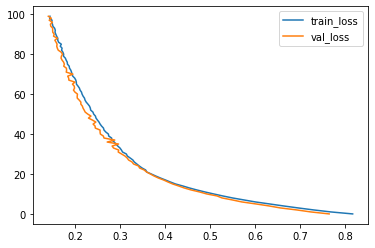

In [137]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.plot(train_loss,range(0,100))
plt.plot(val_loss,range(0,100))
plt.legend(["train_loss","val_loss"])

In [138]:
network_loss,network_accuracy=network.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9967
